In [6]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

In [7]:
df = pd.read_csv("Brasile-real-estate-dataset.csv", encoding='latin1')

In [8]:
df.head()

Unnamed: 0 property_type       state     region       lat        lon  \
0           1     apartment  Pernambuco  Northeast -8.134204 -34.906326   
1           2     apartment  Pernambuco  Northeast -8.126664 -34.903924   
2           3     apartment  Pernambuco  Northeast -8.125550 -34.907601   
3           4     apartment  Pernambuco  Northeast -8.120249 -34.895920   
4           5     apartment  Pernambuco  Northeast -8.142666 -34.906906   

   area_m2  price_brl  
0     72.0  414222.98  
1    136.0  848408.53  
2     75.0  299438.28  
3    187.0  848408.53  
4     80.0  464129.36

In [9]:
df.shape

(12833, 8)

In [11]:
df["price_usd"] = df["price_brl"]*0.19

In [12]:
df = df.drop(columns = ["price_brl"])

In [13]:
df.head()

Unnamed: 0 property_type       state     region       lat        lon  \
0           1     apartment  Pernambuco  Northeast -8.134204 -34.906326   
1           2     apartment  Pernambuco  Northeast -8.126664 -34.903924   
2           3     apartment  Pernambuco  Northeast -8.125550 -34.907601   
3           4     apartment  Pernambuco  Northeast -8.120249 -34.895920   
4           5     apartment  Pernambuco  Northeast -8.142666 -34.906906   

   area_m2    price_usd  
0     72.0   78702.3662  
1    136.0  161197.6207  
2     75.0   56893.2732  
3    187.0  161197.6207  
4     80.0   88184.5784

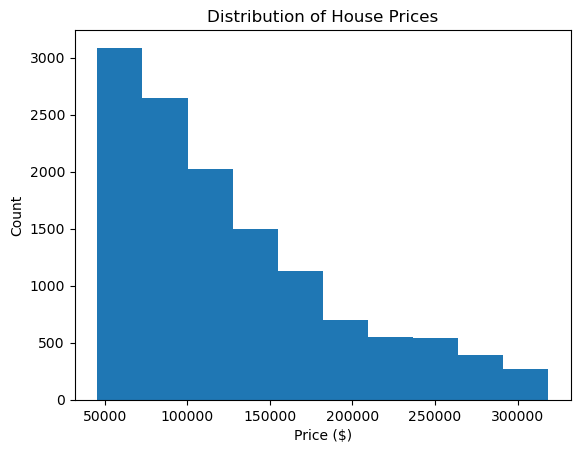

In [16]:
plt.hist(df["price_usd"])
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Distribution of House Prices");

In [17]:
df[["price_usd","area_m2"]].describe()

price_usd       area_m2
count   12833.000000  11293.000000
mean   126394.165338    113.306916
std     66066.694615     47.225496
min     45514.619700     53.000000
25%     73851.896100     75.000000
50%    108097.226300    101.000000
75%    161576.906300    140.000000
max    318602.355000    252.000000

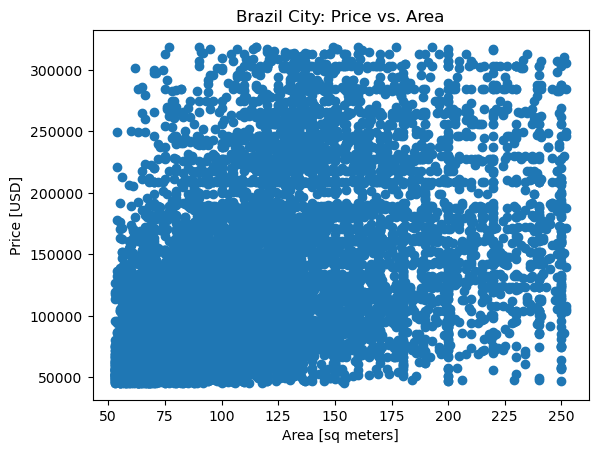

In [19]:
plt.scatter(x = df["area_m2"] , y = df["price_usd"])

plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")

plt.title("Brazil City: Price vs. Area");

In [37]:
fig = px.scatter_3d(
    df,
    x="lat",
    y="lon",
    z="price_usd",
    labels={"lon": "longitude", "lat": "latitude", "price_usd": "price"},
    width=1000,
    height=700,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

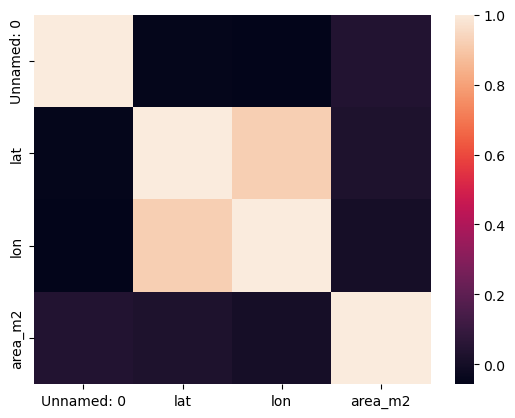

In [38]:
corr = sns.heatmap(df.select_dtypes("number").drop(columns="price_usd").corr())

In [25]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat=df["lat"],
    lon=df["lon"],
    center={"lat": -15.7938, "lon": -47.8827},  # Map will be centered on Mexico City
    width=1000,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

In [33]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat=df["lat"],
    lon=df["lon"],
    center={"lat": -15.7938, "lon": -47.8827},  # Map will be centered on Mexico City
    width=1000,  # Width of map
    height=600,  # Height of map
    color = "price_usd",
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

In [34]:
features = ["lon","lat","area_m2"]
X_train = df[features]
X_train.head()


lon       lat  area_m2
0 -34.906326 -8.134204     72.0
1 -34.903924 -8.126664    136.0
2 -34.907601 -8.125550     75.0
3 -34.895920 -8.120249    187.0
4 -34.906906 -8.142666     80.0

In [35]:
target = "price_usd"
y_train = df[target]
y_train.head()

0     78702.3662
1    161197.6207
2     56893.2732
3    161197.6207
4     88184.5784
Name: price_usd, dtype: float64

In [39]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
baseline_mae = mean_absolute_error(y_train , y_pred_baseline)
print("Mean apt price:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean apt price: 126394.16533817502
Baseline MAE: 53565.495343320326


In [42]:
model = make_pipeline(
    SimpleImputer(),
    LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [44]:
X_test = pd.read_csv("Brasile-real-estate-dataset.csv", encoding='latin1')[features]
print(X_test.info())
X_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lon      12833 non-null  float64
 1   lat      12833 non-null  float64
 2   area_m2  11293 non-null  float64
dtypes: float64(3)
memory usage: 300.9 KB
None


lon       lat  area_m2
0 -34.906326 -8.134204     72.0
1 -34.903924 -8.126664    136.0
2 -34.907601 -8.125550     75.0
3 -34.895920 -8.120249    187.0
4 -34.906906 -8.142666     80.0

In [45]:
y_test_pred = pd.Series(model.predict(X_test))
y_test_pred.head()

0     96722.630343
1    141513.245406
2     98777.633277
3    177240.710935
4    102357.155030
dtype: float64

In [50]:
coefficients = model.named_steps['linearregression'].coef_
intercept = model.named_steps['linearregression'].intercept_
print(coefficients, intercept)

[ 6029.45899183 -4360.18336809   700.14073771] 221312.1374069989


In [66]:
feature_names = [ "lon", "lat", "area_m2"]

def make_prediction(lat, lon, area):
    data = {
        "lon": [lon],
        "lat": [lat],
        "area_m2": [area],
    }
    
    # Create DataFrame with the correct feature names
    df = pd.DataFrame(data)
    
    # Ensure the DataFrame has the same columns as those used during training
    df = df[feature_names]
    
    # Make prediction
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [67]:
interact(
    make_prediction,
    lon=FloatSlider(
        min=X_train["lon"].min(),
        max=X_train["lon"].max(),
        step=0.01,
        value=X_train["lon"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["lat"].min(),
        max=X_train["lat"].max(),
        step=0.01,
        value=X_train["lat"].mean(),
    ),
    area=IntSlider(
        min=X_train["area_m2"].min(),
        max=X_train["area_m2"].max(),
        value=X_train["area_m2"].mean(),
    ),
);

interactive(children=(FloatSlider(value=-24.689864021341155, description='lat', max=-5.044685, min=-33.692432,…

In [68]:
print(make_prediction(-34.903924, -8.126664, 136.0))

Predicted apartment price: $419719.4
